# 2018 NINTENDO SENTIMENT

## Import Relevant Libraries

In [42]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
from datetime import timezone
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from math import pi
import time 
import pickle
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nintendo.functions import (
    create_text2_without_hash_ats_links,
    remove_punctuation,
    make_lower_case,
    lemmatize_text,
    remove_stop_words,
    remove_just_links,
    vader_sentiment,
    trend_line_by_time,
    automated_radar_plots,
    unique_seconds_list,
    second_groupings,
    trend_line_by_5_sec,
    )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laurashummonmaass/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load Tweets to DF

In [2]:
tweets = []
for line in open('NintendoTweets.json', 'r'):
    if len(line)>1:
        tweets.append(json.loads(line))

Flatten json and turn into pandas df.

In [3]:
df = json_normalize(tweets)

## DF Cleaning

In [4]:
len(df)

104695

Select relevant columns

In [5]:
df = df[['user.id', 'text', 'lang', 'created_at', 'timestamp_ms']]

Filter for English only (also uses only relevant columns)  

In [6]:
 df = df.loc[df['lang'] == 'en']

Add a .time. column showing H:M:S    

In [7]:
#outputs str
df['.time.'] = df['created_at'].map(lambda x: x[11:19]) 

In [8]:
#outputs datetime.time
df['datetime'] = df['.time.'].map(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"))
df['datetime'] = df['datetime'].map(lambda x: x.time())

Remove any duplicate rows.

In [9]:
df = df.drop_duplicates(subset=None, keep='first')

## EDA

In [10]:
len(df)

71378

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71378 entries, 0 to 104694
Data columns (total 7 columns):
user.id         71378 non-null float64
text            71378 non-null object
lang            71378 non-null object
created_at      71378 non-null object
timestamp_ms    71378 non-null object
.time.          71378 non-null object
datetime        71378 non-null object
dtypes: float64(1), object(6)
memory usage: 4.4+ MB


In [12]:
df.isna().sum()

user.id         0
text            0
lang            0
created_at      0
timestamp_ms    0
.time.          0
datetime        0
dtype: int64

In [13]:
print(df['.time.'].min())
print(df['.time.'].max())

16:00:24
17:00:23


## Text Cleaning

Remove any words starting with: #, @, or http and put cleaned text into new 'text2' column.

In [18]:
create_text2_without_hash_ats_links(df)

Remove punctuation

In [19]:
remove_punctuation(df)

Make lower case

In [21]:
make_lower_case(df)

Lemmatize

In [23]:
lemmatize_text(df)

Remove stop words

In [25]:
remove_stop_words(df)

Remove links again (some links left over if they began with punctuation)

In [27]:
remove_just_links(df)

Reset Index

In [28]:
df = df.reset_index()

## Vader Sentiments

In [30]:
vader_output = vader_sentiment(df)

In [31]:
matrix_df = json_normalize(vader_output)

In [32]:
df = pd.concat([df, matrix_df], axis=1)

## Trend Lines - Grouped by 5 Seconds

In [37]:
unique_seconds = unique_seconds_list(df)

In [39]:
list_of_second_groups = second_groupings(5, unique_seconds)

In [40]:
seconds_dict = dict(zip(unique_seconds, list_of_second_groups))

Use the dictionary above to assign each tweet to a 5 second group

In [41]:
df['5_seconds'] = df['.time.'].map(seconds_dict)

Trend line

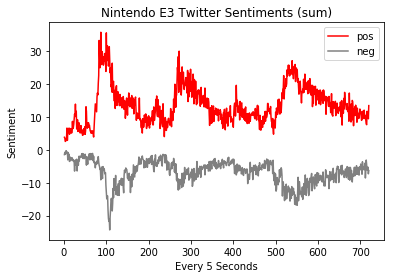

In [43]:
trend_line_by_5_sec(df)

## Trend Lines - With Time Selector

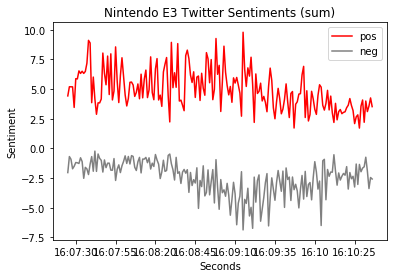

In [44]:
trend_line_by_time(df)

## Radar Plots - With Time Selector

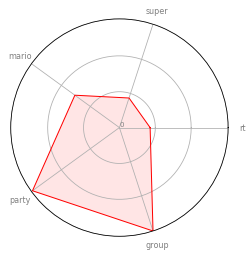

In [46]:
automated_radar_plots(df, 
                           start_time='16:07:24', 
                           end_time='16:08:36', 
                           which_five='top')